#### Эпизод 1

##### Решение

В ваши руки попали данные о платежах некоторой глубоко законспирированной организации - вот они. Судя по всему, поля в данных следует воспринимать предельно просто: CONTRACTOR - кому платёж, STATUS - статус операции, SUM - сумма операции. Давайте попробуем посмотреть, что есть в этих данных.

Задача #1: найдите 3 самых крупных платежа из реально проведённых (статус OK).

Задача #2: определите полную сумму реально проведённых платежей в адрес Umbrella, Inc.

In [1]:
import pandas as pd

def episode_1():
    data = pd.read_csv("laba02/transactions.csv")
    print(f"\033[1mЗадача №1\033[0m:")
    data_ok = data.drop(columns=['Unnamed: 0']).loc[data["STATUS"] == "OK"]
    print(data_ok.sort_values(by='SUM', ascending=False).head(3))
    
    print(f"\n\033[1mЗадача №2\033[0m:")
    data_ubrella = data_ok.loc[data["CONTRACTOR"] == "Umbrella, Inc"]
    print(f"Полная сумма платежей: {data_ubrella['SUM'].sum()}")

    # print(f"\n\033[1mИзначальная таблица\033[0m:")
    # return data

##### Отображение

In [2]:
episode_1()

Задача №1:
         CONTRACTOR STATUS     SUM
5085      Acme, Inc     OK  100500
4451  Umbrella, Inc     OK    1000
1348      Acme, Inc     OK     999

Задача №2:
Полная сумма платежей: 925719


---
#### Эпизод 2

##### Решение

У вас есть набор данных о грузовых рейсах - вот он. Поля в данных: CARGO - авиакомпания, PRICE - стоимость груза на борту, WEIGHT - масса груза на борту.

Задача: посчитайте, сколько рейсов выполнила каждая авиакомпания, полную стоимость и полную массу перевезённых ей грузов. Постройте график уместного вида с результатами.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def episode_2():
    data = pd.read_csv("laba02/flights.csv")

    companies = data['CARGO'].unique()
    print(f"Компании: \033[1m{companies}\033[0m")
    q_dict, p_dict, w_dict = {}, {}, {}

    for company in companies:
        print(f"\nКомпания \033[1m{company}\033[0m:")
        q_dict[company] = int(data['CARGO'].value_counts()[company])
        p_dict[company] = int(data.loc[data['CARGO'] == company]['PRICE'].sum())
        w_dict[company] = int(data.loc[data['CARGO'] == company]['WEIGHT'].sum())
        
        print(f"Кол-во рейсов {q_dict[company]}")
        print(f"Полная стоимость {p_dict[company]}")
        print(f"Полная масса {w_dict[company]}")

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    for i, d in enumerate([q_dict, p_dict, w_dict]):
        axs[i].pie(d.values(), labels=d.keys())
        axs[i].set_title(["Кол-во рейсов", "Полная стоимость", "Полная масса"][i])
    plt.show()

    # print(f"\n\033[1mИзначальная таблица\033[0m:")
    # return data

##### Отображение

Компании: ['Nimble' 'Jumbo' 'Medium']

Компания Nimble:
Кол-во рейсов 500
Полная стоимость 752588
Полная масса 7545

Компания Jumbo:
Кол-во рейсов 50
Полная стоимость 76795
Полная масса 18709

Компания Medium:
Кол-во рейсов 100
Полная стоимость 36312
Полная масса 9507


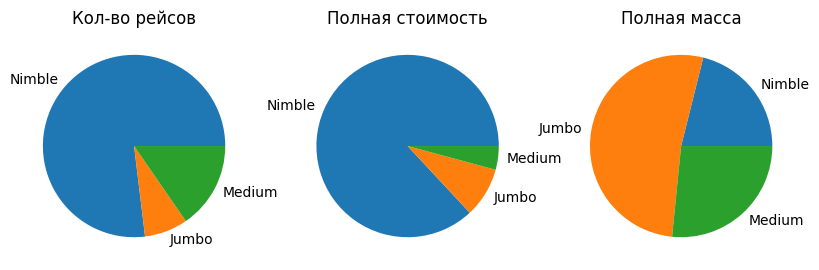

In [17]:
episode_2()

---
#### Эпизод 3

##### Решение

Однажды один факультет 1-го сентября 1-го курса писал входное тестирование по информатике. Вот здесь лежит архив с данными. В архиве xlsx с данными групп от деканата и html-ная таблица результатов из ejudge. (Данные почти настоящие - в жизни они более сумбурные и грязные, двумя файликами дело не ограничивается.)

В xlsx-файле логины студентов (поле login), номера их факультетских групп (поле group_faculty), номера их групп после распределения на группы по информатике (поле group_out). Как воспринимать таблицу результатов ejudge, наверное, отдельно рассказывать не надо. Скажем только, что в ней по счастью используются те же логины (а не ФИО с опечатками).

Задача #1: постройте графики среднего количества решённых задач (а) по факультетским группам, (б) по группам по информатике. Формат графика - любой достаточно наглядный.

Задача #2: определите, из каких факультетских групп пришли и в какие группы по информатике попали люди, которые смогли пройти более одного теста в хотя бы одной из двух последних задач. (Задачи G и H в таблице, каждый тест даёт 10 баллов.) Рисовать график не обязательно, можно просто цифры посчитать.

Дополнительное задание - найдите лёгкие проблемы и нестыковки в исходных данных. Они не мешают решить две поставленные задачи, но они там есть.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def episode_3(d: float = 0.8):
    students = pd.read_excel("laba02/students_info.xlsx")
    students = students.rename(columns={"login": "User"})
    results = pd.read_html("laba02/results_ejudge.html")[0]
    data = pd.merge(students, results, on='User')
    
    print(f"\033[1mЗадача №1\033[0m:")
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Среднее количество решённых задач по:")
    axs[0].set_title("факультетским группам")
    axs[1].set_title("группам по информатике")
    for i, col in enumerate(['group_faculty', 'group_out']):
        groupes = data[col].unique()
        marks = {}
        for group in groupes:
            marks[group] = data.loc[data[col] == group]['Solved'].mean()
        x, y = list(marks.keys()), list(marks.values())
        
        # Сортировка
        tmp = [(int(x[k]), y[k]) for k in range(len(x))]
        tmp = sorted(tmp)
        x, y = [[tmp[k][j] for k in range(len(tmp))] for j in range(2)]
        
        axs[i].bar(range(len(marks)), y)
        axs[i].set_xticks(range(len(marks)))
        axs[i].set_xticklabels(x)
    plt.show()
    
    print(f"\n\033[1mЗадача №2\033[0m:")
    # data_last2 = data.fillna(value=0).loc[data['G'] + data['H'] > 0]
    data_last2 = data.loc[(data['G'] > 0) | (data['H'] > 0)]
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.set_title('Распределение "быстрых" студентов')

    w = 0.3
    h = 0.1
    txt_side = 0.2
    colors = ["aqua", "pink", 'k']

    ax.plot([0-1.1*w, 0-1.1*w], [0-h, 9+h], c=colors[2])
    ax.plot([1+1.1*w, 1+1.1*w], [0-h, 9+h], c=colors[2])
    ax.plot([0-1.1*w, 1+1.1*w], [0-h, 0-h], c=colors[2])
    ax.plot([0-1.1*w, 1+1.1*w], [9+h, 9+h], c=colors[2])
    for i_1 in data['group_faculty'].unique():
        c = colors[0] if i_1 in data_last2['group_faculty'].unique() else "gray"
        x, y = 0, i_1
        rect = patches.Rectangle((x-w, y-h), 2*w, 2*h, linewidth=10, edgecolor=c, facecolor=c)
        ax.add_patch(rect)
        ax.text(x - txt_side, y, f"{i_1}")
    for i_2 in data['group_out'].unique():
        c = colors[1] if i_2 in data_last2['group_out'].unique() else "gray"
        x, y = 1, i_2 - 30
        rect = patches.Rectangle((x-w, y-h), 2*w, 2*h, linewidth=10, edgecolor=c, facecolor=c)
        ax.add_patch(rect)
        ax.text(x + txt_side, y, f"{i_2}")

    for i_1 in data_last2['group_faculty'].unique():
        for i_2 in data_last2['group_out'].unique():
            tmp = data_last2.loc[data_last2['group_faculty'] == i_1].loc[data_last2['group_out'] == i_2]
            n = len(list(tmp["User"]))
            if n > 0:
                x1, y1 = 0, i_1
                x2, y2 = 1, i_2 - 30
                ax.plot([x1+w, x2-w], [y1+h, y2-h], c="c")
                ax.text((x1+w)*d + (x2-w)*(1-d), (y1+h)*d + (y2-h)*(1-d), f"{n}")
            print(f"{n} студентов попало из {i_1} группы в {i_2}")
    plt.show()
    
    return data_last2

##### Отображение

Задача №1:


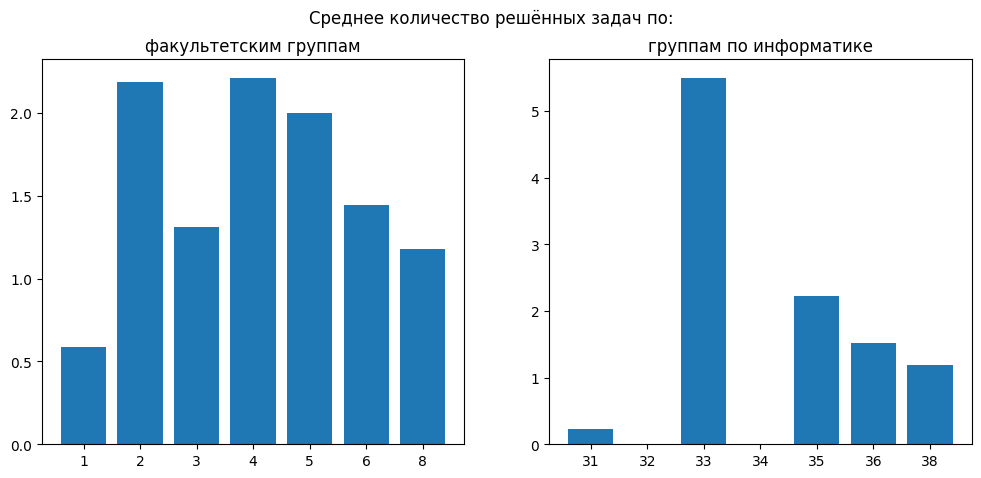


Задача №2:
4 студентов попало из 2 группы в 33
1 студентов попало из 2 группы в 36
0 студентов попало из 2 группы в 35
1 студентов попало из 3 группы в 33
0 студентов попало из 3 группы в 36
2 студентов попало из 3 группы в 35
1 студентов попало из 4 группы в 33
0 студентов попало из 4 группы в 36
0 студентов попало из 4 группы в 35
3 студентов попало из 5 группы в 33
0 студентов попало из 5 группы в 36
2 студентов попало из 5 группы в 35


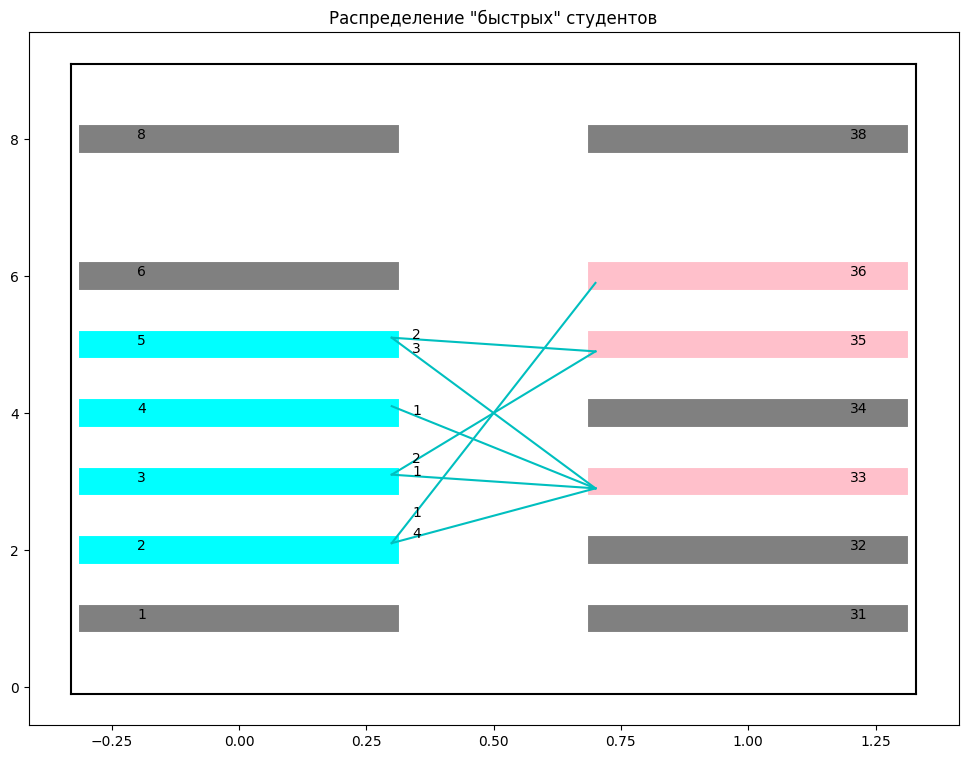

,User,group_faculty,group_out,Place,A,B,C,D,E,F,G,H,Solved,Score
18,r0300202,2,33,6,10.0,9.0,20.0,20.0,20.0,30.0,9.0,10.0,6,128
21,r0300205,2,33,1,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
22,r0300206,2,33,2,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
25,r0300209,2,33,5,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132
28,r0300212,2,36,20-21,10.0,3.0,20.0,NaN,20.0,NaN,NaN,20.0,3,73
33,r0300301,3,35,24,9.0,5.0,NaN,NaN,NaN,23.0,8.0,23.0,1,68
44,r0300312,3,35,20-21,10.0,10.0,14.0,NaN,NaN,30.0,9.0,NaN,3,73
46,r0300314,3,33,4,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
61,r0300414,4,33,12,10.0,6.0,20.0,20.0,NaN,30.0,NaN,15.0,4,101
64,r0300502,5,33,13,10.0,10.0,19.0,19.0,NaN,29.0,9.0,NaN,5,96


In [25]:
episode_3(d=0.9)